In [9]:
import pandas as pd

xls = pd.ExcelFile('STAT.xlsx')

novak = pd.read_excel(xls, 'DJOKOVIC')
novak

,YEAR,PRIZE MONEY,SINGLES TITLES,DOUBLES TITLES,SINGLES W-L
0,2019,11182355,5,0,53-9
1,2018,15967184,4,0,53-12
2,2017,2116524,2,0,32-8
3,2016,14138824,7,0,65-9
4,2015,16760145,11,0,78-5
5,2014,14269462,7,0,61-8
6,2013,12447947,7,0,74-9
7,2012,12803737,6,0,75-12
8,2011,12619803,10,0,70-6
9,2010,4278857,2,1,61-18


In [10]:
def get_w_l(df):
    SINGLES_W = []
    SINGLES_L = []
    for i in df['SINGLES W-L']:
        SINGLES_W.append(int(i.split("-")[0]))
        SINGLES_L.append(int(i.split("-")[1]))
    return SINGLES_W, SINGLES_L

novak = novak.iloc[:-1,]
novak['SINGLES_W'], novak['SINGLES_L'] = get_w_l(novak)
novak.drop(['SINGLES W-L'], axis = 1, inplace=True)

novak.set_index('YEAR', inplace = True)
novak.index = pd.to_datetime(novak.index, format = "%Y")
novak.index = novak.index.year

#novak = pd.to_numeric(novak, errors = "coerce")
novak = novak.astype('int')

novak = novak[::-1]
novak

/Users/Mavis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Mavis/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PRIZE MONEY,SINGLES TITLES,DOUBLES TITLES,SINGLES_W,SINGLES_L
YEAR,,,,,
2007,3313700,5,0,68,15
2008,5689077,4,0,64,17
2009,5476471,5,0,78,19
2010,4278857,2,1,61,18
2011,12619803,10,0,70,6
2012,12803737,6,0,75,12
2013,12447947,7,0,74,9
2014,14269462,7,0,61,8
2015,16760145,11,0,78,5


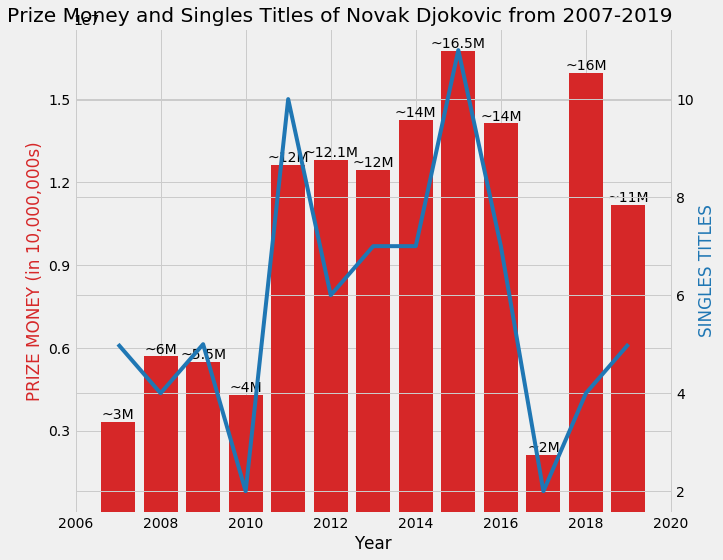

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
#import seaborn as sns
#sns.set(style = 'darkgrid')
style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize = (10, 8))
#y = [3, 6, 5.5, 9, 12, 12, 12, 14, 16.5, 14, 2, 16, 11]

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('PRIZE MONEY (in 10,000,000s)', color=color)
ax1.bar(novak.index, novak['PRIZE MONEY'], color=color)
ax1.set_yticks([3000000, 6000000, 9000000, 12000000, 15000000])

rects = ax1.patches

# Make some labels.
labels = ["~3M", "~6M", "~5.5M", "~4M", "~12M", "~12.1M", "~12M", "~14M", "~16.5M", "~14M",
          "~2M", "~16M", "~11M"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SINGLES TITLES', color=color)  # we already handled the x-label with ax1
ax2.plot(novak.index, novak['SINGLES TITLES'], color=color)
#ax2.grid(False)

#ax2.tick_params(axis='y', labelcolor=color)
plt.title("Prize Money and Singles Titles of Novak Djokovic from 2007-2019", loc = "right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [14]:
#novak['name'] = 'Djokovic'
#federer['name'] = 'federer'
#nadal['name'] = 'nadal'
#nishikori['name'] = 'nishikori'

df = pd.concat([novak[['SINGLES TITLES']], federer[['SINGLES TITLES']], nadal[['SINGLES TITLES']], nishikori[['SINGLES TITLES']]], axis =1)
df.columns = ['Djokovic', 'Federer', 'Nadal', 'Nishikori']
df.to_csv('all.csv')
df

,Djokovic,Federer,Nadal,Nishikori
YEAR,,,,
2007,5,7,6,0
2008,4,4,8,1
2009,5,4,5,0
2010,2,5,7,0
2011,10,4,3,0
2012,6,6,4,1
2013,7,1,10,1
2014,7,5,4,4
2015,11,6,3,3


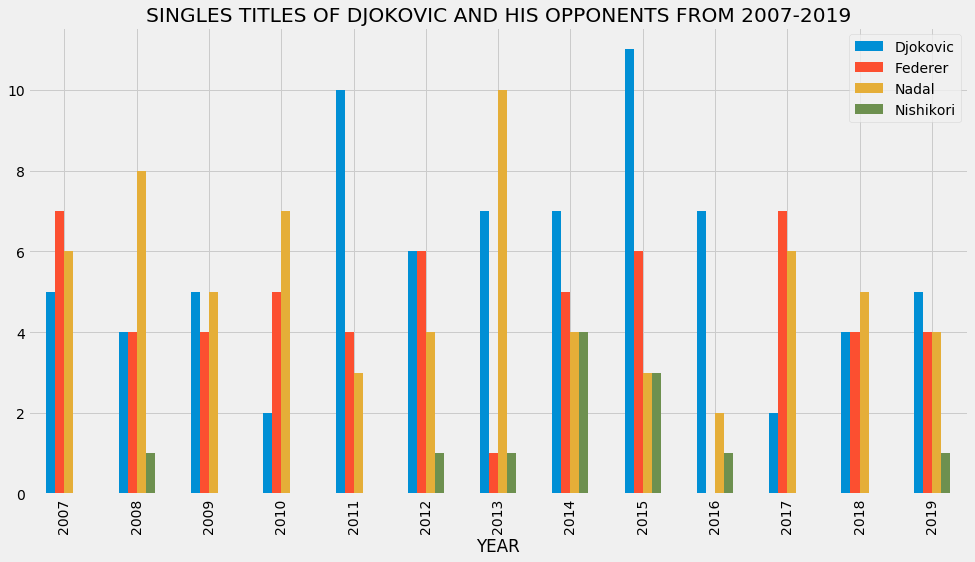

In [15]:
df.plot(kind='bar', figsize = (15, 8), title="SINGLES TITLES OF DJOKOVIC AND HIS OPPONENTS FROM 2007-2019")

In [11]:
federer = pd.read_excel(xls, 'FEDERER')

federer = federer.iloc[:-1,]
federer['SINGLES_W'], federer['SINGLES_L'] = get_w_l(federer)
federer.drop(['SINGLES W-L'], axis = 1, inplace=True)

federer.set_index('YEAR', inplace = True)
federer.index = pd.to_datetime(federer.index, format = "%Y").year

federer = federer.astype('int')

federer = federer[::-1]
federer

,PRIZE MONEY,SINGLES TITLES,DOUBLES TITLES,SINGLES_W,SINGLES_L
YEAR,,,,,
2007,7405620,7,0,63,7
2008,5886879,4,1,66,15
2009,8768110,4,0,61,12
2010,7698289,5,0,65,13
2011,6369576,4,0,64,12
2012,8584842,6,0,71,12
2013,3203637,1,0,45,17
2014,9393122,5,0,73,12
2015,6634017,6,0,59,10


In [12]:
nadal = pd.read_excel(xls, 'NADAL')

nadal = nadal.iloc[:-1,]
nadal['SINGLES_W'], nadal['SINGLES_L'] = get_w_l(nadal)
nadal.drop(['SINGLES W-L'], axis = 1, inplace=True)

nadal.set_index('YEAR', inplace = True)
nadal.index = pd.to_datetime(nadal.index, format = "%Y").year

nadal = nadal.astype('int')
nadal = nadal[::-1]
nadal

,PRIZE MONEY,SINGLES TITLES,DOUBLES TITLES,SINGLES_W,SINGLES_L
YEAR,,,,,
2007,4395185,6,0,64,12
2008,6773773,8,1,82,11
2009,6466515,5,1,66,14
2010,7711998,7,1,67,9
2011,7668214,3,1,69,15
2012,4997448,4,1,42,6
2013,14570935,10,0,75,7
2014,6746473,4,0,48,11
2015,3275888,3,1,58,19


In [13]:
nishikori = pd.read_excel(xls, 'NISHIKORI')

nishikori = nishikori.iloc[:-1,]
nishikori['SINGLES_W'], nishikori['SINGLES_L'] = get_w_l(nishikori)
nishikori.drop(['SINGLES W-L'], axis = 1, inplace=True)

nishikori.set_index('YEAR', inplace = True)
nishikori.index = pd.to_datetime(nishikori.index, format = "%Y").year

nishikori = nishikori.astype('int')

nishikori = nishikori[::-1]
nishikori

,PRIZE MONEY,SINGLES TITLES,DOUBLES TITLES,SINGLES_W,SINGLES_L
YEAR,,,,,
2007,34838,0,0,3,3
2008,303269,1,0,16,12
2009,51138,0,0,4,6
2010,171394,0,0,3,9
2011,776621,0,0,36,22
2012,1044847,1,0,37,18
2013,1180923,1,0,36,19
2014,4439218,4,0,54,14
2015,2712055,3,0,53,14


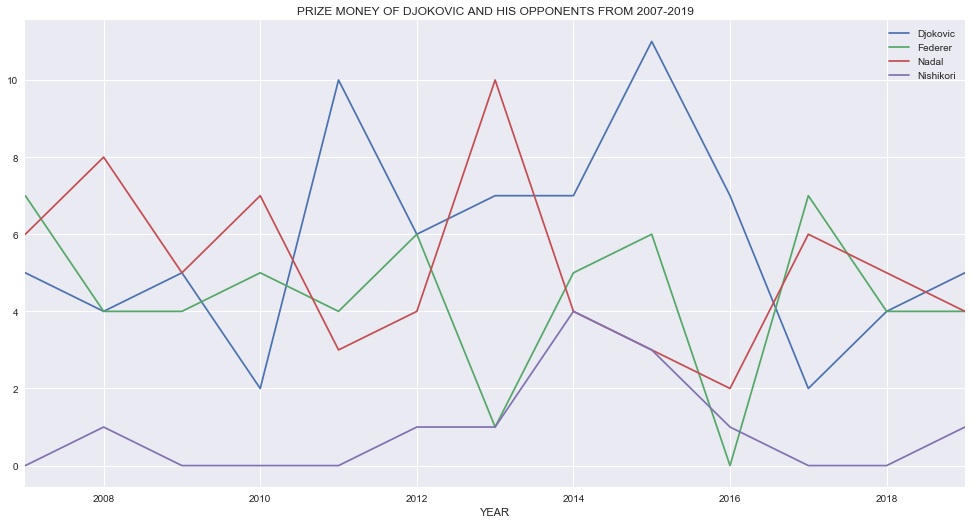

In [10]:
style.use('seaborn')
df2 = pd.concat([novak[['PRIZE MONEY']], federer[['PRIZE MONEY']], nadal[['PRIZE MONEY']], nishikori[['PRIZE MONEY']]], axis =1)
df2.columns = ['Djokovic', 'Federer', 'Nadal', 'Nishikori']
df2
df.plot(figsize = (15, 8), title="PRIZE MONEY OF DJOKOVIC AND HIS OPPONENTS FROM 2007-2019")

Text(0.5, 0.98, 'SINGLES TITLES AND PRIZE MONEY OF DJOKOVIC AND HIS OPPONENTS FROM 2007-2019')

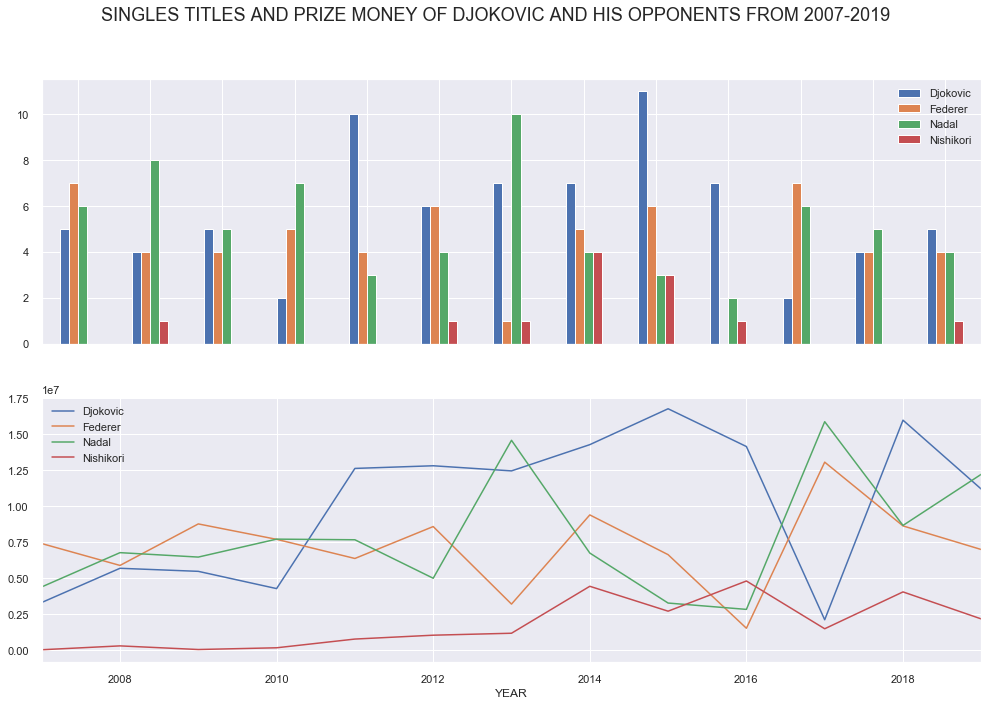

In [28]:
import seaborn as sns
sns.set(style = 'darkgrid')
fig, axes = plt.subplots(2, 1)
fig = plt.gcf()
fig.set_size_inches(15, 10)
df.plot.bar(ax=axes[0])
df2.plot(ax=axes[1], sharex=axes[0])
plt.suptitle('SINGLES TITLES AND PRIZE MONEY OF DJOKOVIC AND HIS OPPONENTS FROM 2007-2019', size = 18)

No handles with labels found to put in legend.


Text(0.5, 0.98, 'SINGLES TITLES AND PRIZE MONEY OF DJOKOVIC AND HIS OPPONENTS FROM 2007-2019')

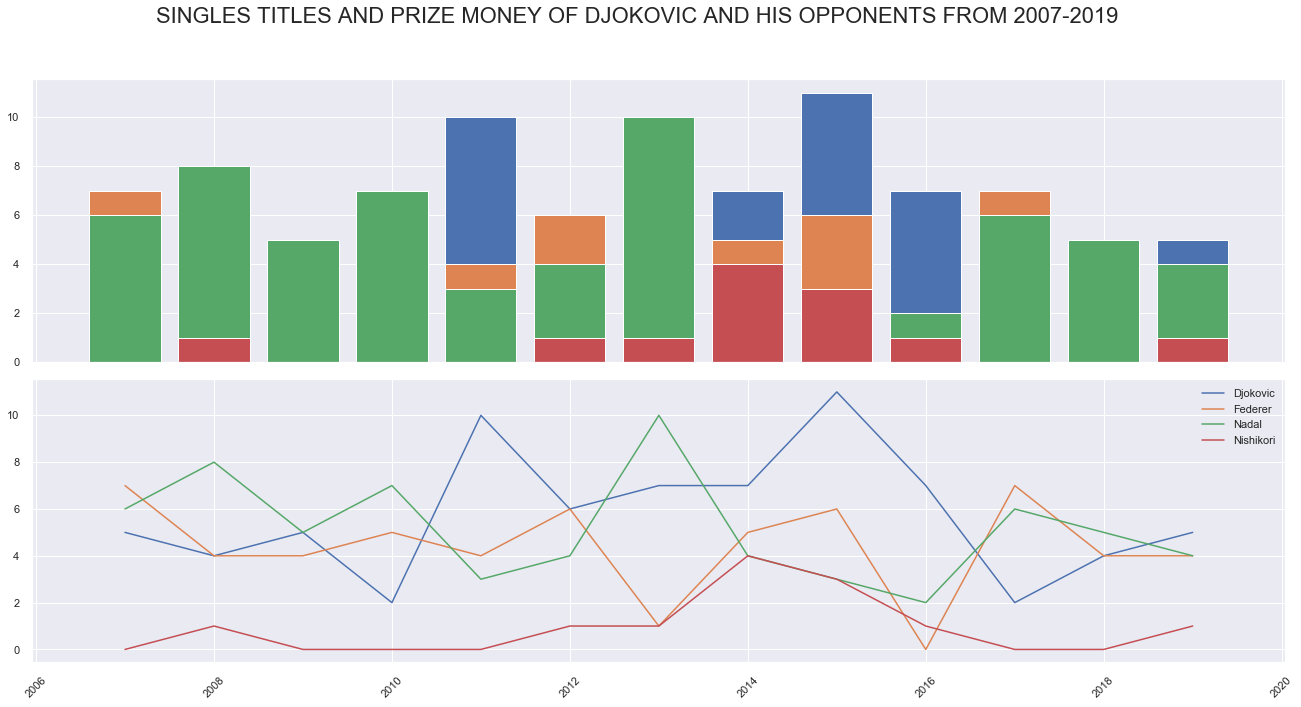

In [27]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (20, 10))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=3, colspan=1)
ax2 = plt.subplot2grid((6, 1), (3, 0), rowspan=3, colspan=1, sharex = ax1)


ax1.bar(df.index, df['Djokovic'])
ax1.bar(df.index, df['Federer'])
ax1.bar(df.index, df['Nadal'])
ax1.bar(df.index, df['Nishikori'])
ax2.plot(df2.index, df['Djokovic'])
ax2.plot(df2.index, df['Federer'])
ax2.plot(df2.index, df['Nadal'])
ax2.plot(df2.index, df['Nishikori'])

#ax2.plot([],[], color='r', alpha=0.8, label='TSLA')
#ax2.plot([],[], color='g', alpha=0.8, label='NIO')

# Hide xaxis
plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels(), visible=False)

plt.xticks(rotation = 45)

ax1.legend()
ax2.legend()


plt.suptitle('SINGLES TITLES AND PRIZE MONEY OF DJOKOVIC AND HIS OPPONENTS FROM 2007-2019', fontsize=22)

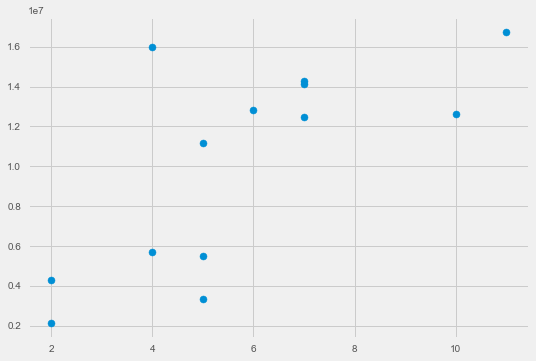

In [43]:
novak['PRIZE MONEY'].corr(novak['SINGLES TITLES'])

plt.scatter(novak['SINGLES TITLES'], novak['PRIZE MONEY'])

In [43]:
import statsmodels.api as sm
Y = novak['PRIZE MONEY']
X = novak[['SINGLES TITLES', 'DOUBLES TITLES']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PRIZE MONEY   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4.956
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0319
Time:                        01:33:42   Log-Likelihood:                -214.34
No. Observations:                  13   AIC:                             434.7
Df Residuals:                      10   BIC:                             436.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.603e+06   3.11e+06      0.838      0.421   -4.32e+06    9.52e+06
SINGLES TITLES  1.309e+06   4.74e+05      2.761      0.020    2.53e+05    2.37e+06
DOUBLES TITLES -9.421e+05   4.58e+06     -0.206      0.841   -1.12e+07    9.27e+06
==============================================================================
Omnibus:                        1.563   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                0.515
Skew:                           0.486   Prob(JB):                        0.773
Kurtosis:                       3.086   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
import statsmodels.api as sm
Y = novak['PRIZE MONEY']
X = novak['SINGLES TITLES']
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PRIZE MONEY   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     10.81
Date:                Thu, 07 Nov 2019   Prob (F-statistic):            0.00723
Time:                        01:48:54   Log-Likelihood:                -214.37
No. Observations:                  13   AIC:                             432.7
Df Residuals:                      11   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.293e+06   2.59e+06      0.884      0.396   -3.42e+06       8e+06
SINGLES TITLES   1.35e+06   4.11e+05      3.288      0.007    4.46e+05    2.25e+06
==============================================================================
Omnibus:                        2.043   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                0.731
Skew:                           0.575   Prob(JB):                        0.694
Kurtosis:                       3.168   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: shapes (10,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

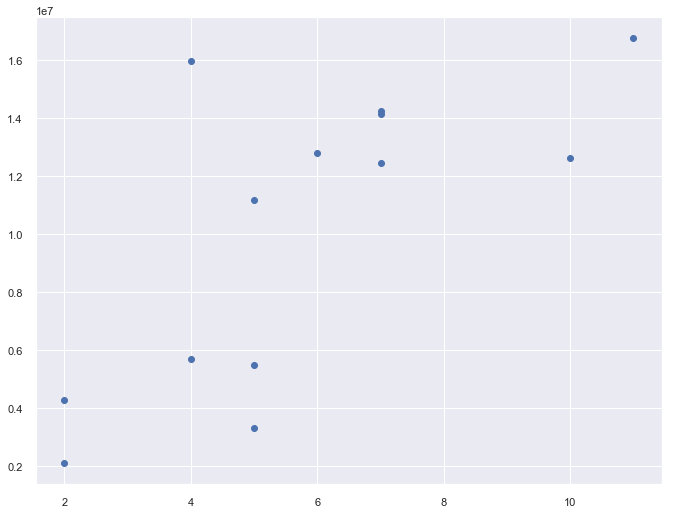

In [60]:
import numpy as np
plt.figure(figsize = (10, 8))

plt.scatter(novak['SINGLES TITLES'], novak['PRIZE MONEY'], color = 'b')

x_pred = np.linspace(novak['SINGLES TITLES'].min(), novak['SINGLES TITLES'].max(), 10)

#x_pred2 = sm.add_constant(x_pred)

df_predict = pd.DataFrame(x_pred, columns=['SINGLES TITLES'])
y_pred = results2.predict(df_predict)
plt.plot(x_pred, y_pred, color = 'r')

plt.grid(True)

plt.xlabel('SINGLES TITLES')
plt.ylabel('PRIZE MONEY')

plt.title('NOVAK PRIZE MONEY AND SINGLES TITLES', size = 18)

In [57]:
results2.params

const             2.293406e+06
SINGLES TITLES    1.349997e+06
dtype: float64

In [59]:
df_predict

,SINGLES TITLES
0,2.00
1,4.25
2,6.50
3,8.75
4,11.00
